## Phase 1: Data Inspection & Structural Audit
1. Load & Glimpse Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

2. Variable Categorization

In [4]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [5]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

3. Target Variable Analysis (SalePrice)

In [7]:
data['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


4. Calculate mean, median, skewness, and kurtosis.

In [8]:
mean = data['SalePrice'].mean()
median = data['SalePrice'].median()
skewness = data['SalePrice'].skew()
kurtosis = data['SalePrice'].kurt()

print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Mean: 180921.19589041095
Median: 163000.0
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


- Histogram and Q-Q Plot

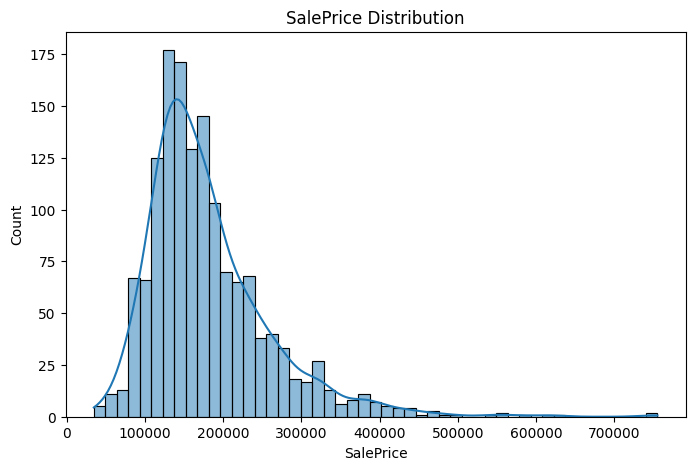

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

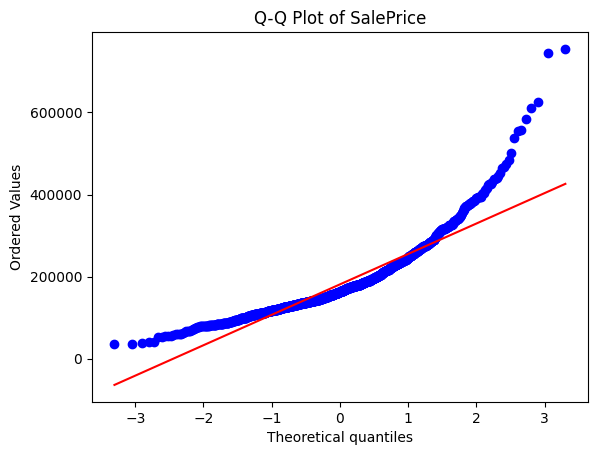

In [11]:
stats.probplot(data['SalePrice'], dist="norm", plot=plt)
plt.title("Q-Q Plot of SalePrice")
plt.show()

**Normality Check**

- If skewness > 1 → highly right-skewed.

**Log Transformation (If Not Normal)**

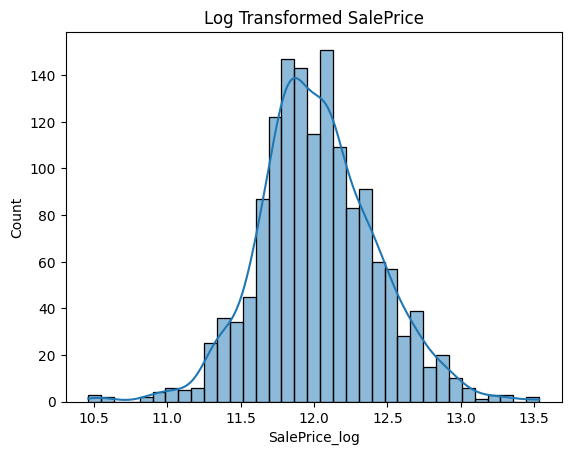

In [12]:
data['SalePrice_log'] = np.log1p(data['SalePrice'])
sns.histplot(data['SalePrice_log'], kde=True)
plt.title("Log Transformed SalePrice")
plt.show()


## Phase 2: The "Cleaning" Ritual (IQR Method)
 1. IQR Calculation

In [13]:
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: 3937.5
Upper Bound: 340037.5


- The Task: Filter your dataframe to keep only the rows where SalePrice falls between these two
bounds.

In [16]:
data_clean = data[(data['SalePrice'] >= lower_bound) &
              (data['SalePrice'] <= upper_bound)]


In [17]:
data_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,11.864469


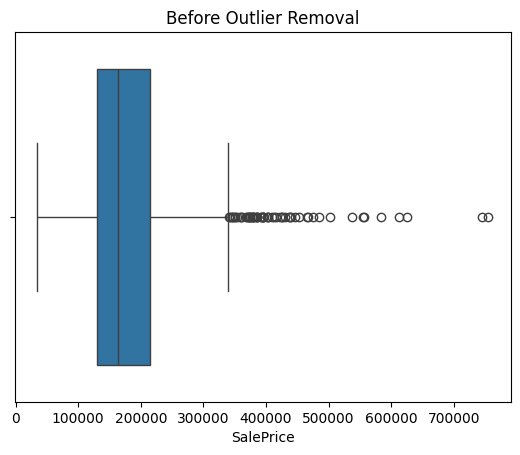

In [18]:
#plt.figure(figsize=(6,4))
sns.boxplot(x=data['SalePrice'])
plt.title("Before Outlier Removal")
plt.show()


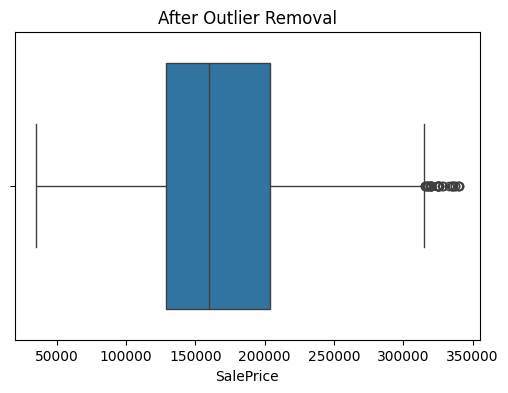

In [20]:
#Boxplot AFTER Cleaning
plt.figure(figsize=(6,4))
sns.boxplot(x=data_clean['SalePrice'])
plt.title("After Outlier Removal")
plt.show()


## Phase 3: Multivariate Analysis
- Correlation Matrix

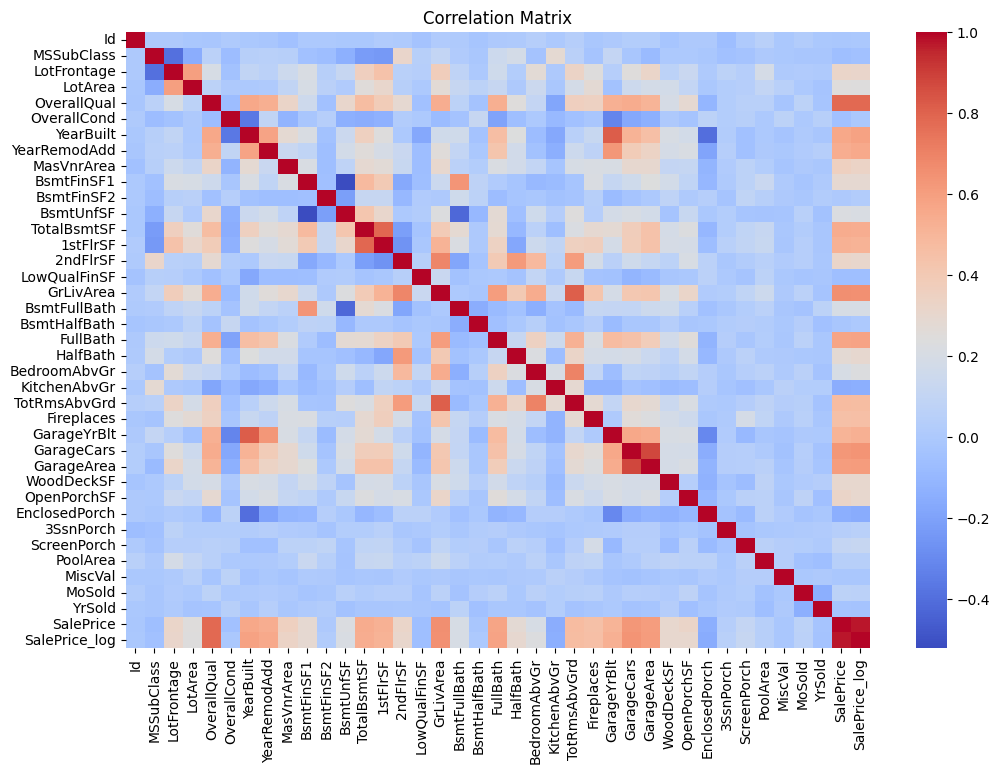

In [21]:
plt.figure(figsize=(12,8))
corr_matrix = data_clean.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


- Top 10 Correlated Features with SalePrice

In [22]:
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(11)
print(top_corr)


SalePrice        1.000000
SalePrice_log    0.970421
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
Name: SalePrice, dtype: float64


- OverallQual vs SalePrice

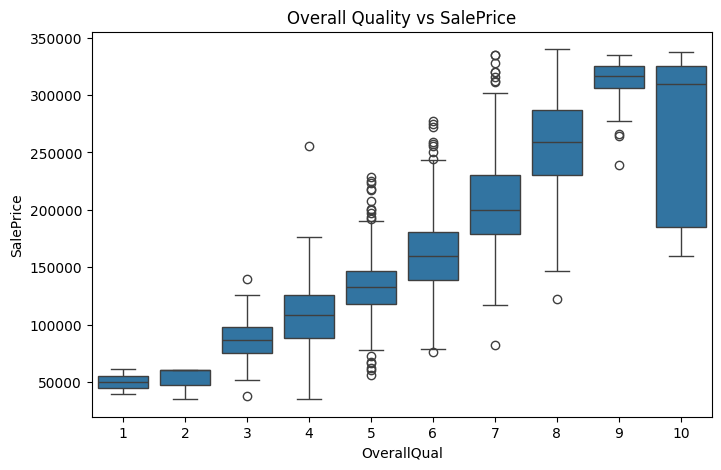

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=data_clean)
plt.title("Overall Quality vs SalePrice")
plt.show()


- Neighborhood Analysis

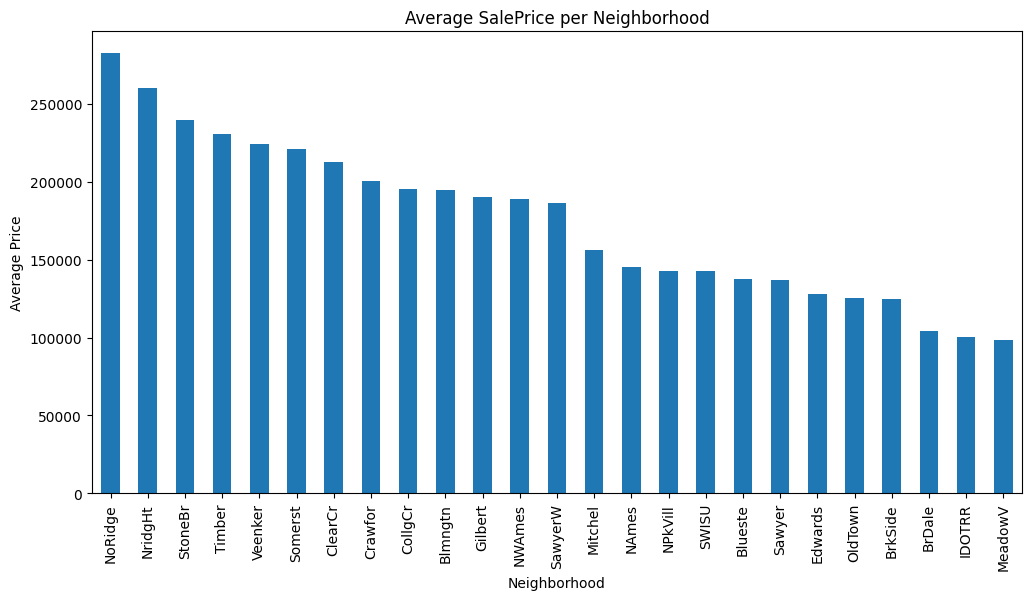

In [24]:
neigh_price = data_clean.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
neigh_price.plot(kind='bar')
plt.title("Average SalePrice per Neighborhood")
plt.ylabel("Average Price")
plt.show()


**Highest average price neighborhood = "Beverly Hills" of dataset.**

## Phase 4: Managerial Report

1. **Top 3 Drivers of House Price**

Based on correlation:

OverallQual – Overall material and finish quality

GrLivArea – Above ground living area (sq ft)

GarageCars / GarageArea – Garage capacity

These features show strongest positive correlation with SalePrice.





2. **Anomaly Report (Missing Values)**

In [25]:
missing = data.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(10)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageYrBlt,81
GarageFinish,81


3. Most Impactful 4 Charts

- SalePrice Histogram (Before & After Log)

- Boxplot Before vs After Outlier Removal

- Correlation Heatmap

- OverallQual vs SalePrice Boxplot